<p>Calculating the Signal-to-Noise Ratio (SNR) from SDSS BOSS (Baryon Oscillation Spectroscopic Survey) spectral data. Whether you're a student, researcher, or astronomy enthusiast, this step-by-step guide will help you understand how to extract and analyze SNR from real spectroscopic data.</p>

<h1>What’s Covered:</h1>
<ul>
<li>Introduction to SDSS and BOSS data</li>

<li>Downloading and reading BOSS spectra (FITS format)</li>

<li>Identifying flux and inverse variance (ivar) arrays</li>

<li>Calculating per-pixel and average SNR</li>

<li>Python code demonstration using astropy, numpy, and matplotlib</li>

<li>Tips for quality checks and interpreting SNR</li>
</ul>

<h1>Tools Used:</h1>
<ol>
<li>Python</li>

<li>Astropy</li>

<li>Numpy</li>

<li>Matplotlib</li>

<li>SDSS DR12/DR16 data access</li>
</ol>

<h3>Tutorial Objective: How to Visualize Signal To Noise Ratio (SNR) of Galaxy Data Cube?</h3>

Step-0: Download/Access Galaxy Data:SDSS MANGA observation

Step-1: Import Required Library

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

Step-2: Read/Open Galaxy Fits Data cube

In [3]:
cube = fits.open("manga-11863-1901-LINCUBE.fits.gz") #reads data cube
#Extract information about data cube
cube.info()

Filename: manga-11863-1901-LINCUBE.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  FLUX          1 ImageHDU       100   (34, 34, 6732)   float32   
  2  IVAR          1 ImageHDU        17   (34, 34, 6732)   float32   
  3  MASK          1 ImageHDU        17   (34, 34, 6732)   int32   
  4  LSFPOST       1 ImageHDU        11   (34, 34, 6732)   float32   
  5  LSFPRE        1 ImageHDU        11   (34, 34, 6732)   float32   
  6  WAVE          1 ImageHDU         9   (6732,)   float64   
  7  SPECRES       1 ImageHDU         9   (6732,)   float64   
  8  SPECRESD      1 ImageHDU         9   (6732,)   float64   
  9  PRESPECRES    1 ImageHDU         9   (6732,)   float64   
 10  PRESPECRESD    1 ImageHDU         9   (6732,)   float64   
 11  OBSINFO       1 BinTableHDU    148   12R x 65C   [26A, 17A, 5A, J, I, 8A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E,

Step-3:Extract Data: FLUX, IVAR & WAVELENGTH

In [4]:
#Extract flux data
flux = cube['FLUX'].data

#IVAR
ivar = cube['IVAR'].data

#WAVE lambda
wl = cube['WAVE'].data

Step-4: FLUX error estimation

FLUX_Err = $\sqrt{1/IVAR}$

In [5]:
flux_err = np.sqrt(1/ivar)  # FLUX error estimation
flux_err.shape

/tmp/ipykernel_1058/1150042157.py:1: RuntimeWarning: divide by zero encountered in divide
  flux_err = np.sqrt(1/ivar)  # FLUX error estimation


(6732, 34, 34)

Step-5: Estimate Signal To Noise Ration (SNR):

SNR Cube = $\frac{Flux Cube}{Flux_{err} Cube}$

In [ ]:
snr_cube = flux/flux_err #SNR data cube
snr_cube.shape

(6732, 34, 34)

Step-6: Visualise SNR 2D Map: At each Zpixel or Wavelength axis

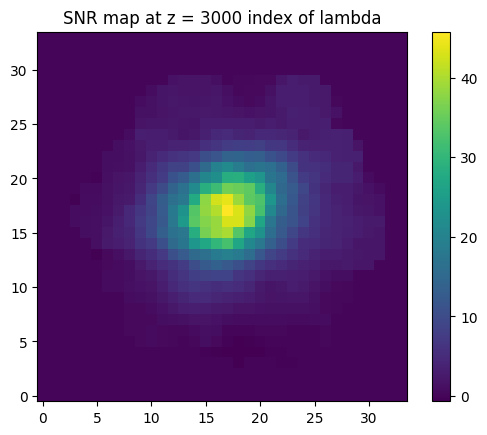

In [13]:
plt.figure()
plt.imshow(snr_cube[3000,:,:], origin = 'lower') #snr_cube[z,Y,X] = snr_cube[Zpixel, Ypixel, Xpixel]
plt.colorbar()
plt.title('SNR map at z = 3000 index of lambda')
plt.show()

Step-7: Visualize Spaxel SNR 1D Plot: At Each(X,Y) Pixel

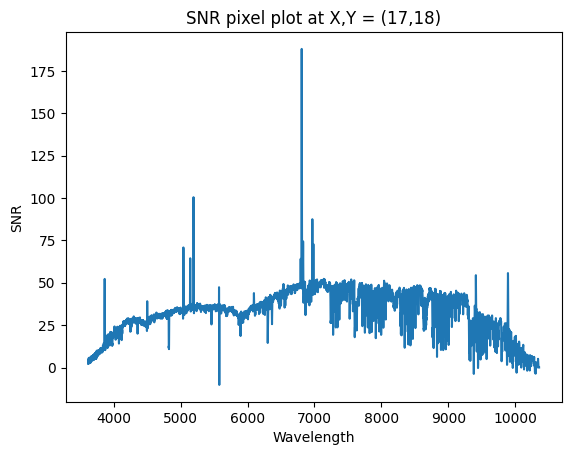

In [31]:
plt.figure()
plt.plot(wl, snr_cube[:,17,17]) #at central spaxel #snr_cube[:,Y,X] at spectra(X,Y)
plt.title('SNR pixel plot at X,Y = (17,18)')
plt.xlabel('Wavelength')
plt.ylabel('SNR')
plt.show()

Step-8: Create SNR DAta cube map: Save as FITS Data Cube

In [32]:
fits.writeto('snr_cube.fits', snr_cube, overwrite = True) #SNR data cube saved as FITS file

In [33]:
ls *fits

snr_cube.fits
